# Regularization

- it is an extremely important concept in machine learning. It’s a way to prevent overfitting, and thus, improve the likely generalization performance of a model by reducing the complexity of the final estimated model.
- In regularization, what we do is normally we keep the same number of features, but reduce the magnitude of the coefficients.
- Main Objective of regularization is to scale down the coeficient Value.

Ex:- 
Real Value

0.9+1.2x1+20x2+39x3
- as you all see there are 1.2,20,39 are three coefficient. we easily say which have high coefficient this effect highly our target variable as x3 has high coefficient it has higly corelate with target variable.
- so but this may cause overfit in real life problem. so we need to scale down these coefficient value to decrease the complexity of model

After Scale down(By appling some regularization techinque)

0.9+0.7x1+2x2+5x3

- see here i apply regularization and scaled down the value of coefficient. as this is low value so here the model give good accuracy. so we always tries to scaled down the coeficient value.

<br>

- Now lets dicuss how we scaled down these value.
- In regularization two type of method 

            1. Ridge Regression
            2. Lasso Regression

### Ridge Regression :

   ### Formula : Ridge = Loss + α $||W||^2$
   
- Whrer Loss = Difference between predict and actual value (Or Cost Function)
- W = slope
- α = constnt

<img src="55.png">

- See in this picture how coeficient value reduced by giving the differnet α Value.


### Lasso Regression :

### Formula:  Lasso =  Loss + α  ||𝑊||

- Whrer Loss = Difference between predict and actual value (Or Cost Function)
- W = slope
- α = constnt

- In this we can consider only absolute value.

<img src="66.png">


- As you see in above picture it can reduce the magnitude as well as it reduce the feature. so Lasso is also used for feature selection.

### Note :

1. Regularization is mainly used for Scaled down the coeficient value so that overfit not happen in model.
2. Regularization reduce complexity of model
3. in Ridge Regression magnitude of coefficient is almost zero , but in Lasso magnitude of coefficient is exaclty zero.
4. we can find appropriate α value by doing Cross validation.
5. α value is always 0 to any +ve number.
6. Lasso is used for feature selection.
7. Ridge Also called as L2 Regularization, and Lasso Is L1 Regularization.

### Now Implement In Python

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.datasets import load_boston

import warnings
warnings.simplefilter('ignore')

In [2]:
df=load_boston()
dataset = pd.DataFrame(df.data)
dataset.columns=df.feature_names
dataset["Price"]=df.target
dataset.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Price
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [3]:
X=dataset.iloc[:,:-1] ## independent features
y=dataset.iloc[:,-1] ## dependent features

## Linear Regression

- First i am going to apply linear regression and find out the MSE Value. Then i apply both Lasso And Rigde to comapre which has less MSE.

In [4]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression

lin_regressor=LinearRegression()
mse=cross_val_score(lin_regressor,X,y,scoring='neg_mean_squared_error',cv=5)
lin_regressor.fit(X,y)
mean_mse=np.mean(mse)
print(mean_mse)

-37.13180746769922


- here i take neg_mean_squared_error instead of mean_squared_error, there no differnece between these

## Ridge Regression

In [5]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV

ridge=Ridge()

#here i do CV for find alpha value
parameters={'alpha':[1e-15,1e-10,1e-8,1e-3,1e-2,1,5,10,20,30,35,40,45,50,55,100]}
ridge_regressor=GridSearchCV(ridge,parameters,scoring='neg_mean_squared_error',cv=5)
ridge_regressor.fit(X,y)

print(ridge_regressor.best_params_)
print(ridge_regressor.best_score_)

{'alpha': 100}
-29.90570194754033


#### See here Rigde Regression give -29 Mse value which is lower than Linear Regression

## Lasso Regression

In [6]:
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV
lasso=Lasso()

#here i do CV for find alpha value
parameters={'alpha':[1e-15,1e-10,1e-8,1e-3,1e-2,1,5,10,20,30,35,40,45,50,55,100]}
lasso_regressor=GridSearchCV(lasso,parameters,scoring='neg_mean_squared_error',cv=5)

lasso_regressor.fit(X,y)
print(lasso_regressor.best_params_)
print(lasso_regressor.best_score_)

{'alpha': 1}
-35.531580220694856


In [7]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [8]:
prediction_lasso=lasso_regressor.predict(X_test)
prediction_ridge=ridge_regressor.predict(X_test)

<AxesSubplot:xlabel='Price', ylabel='Density'>

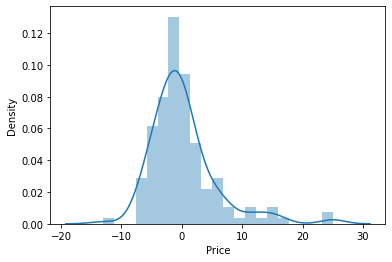

In [9]:
#graph for lasso
sns.distplot(y_test-prediction_lasso)

<AxesSubplot:xlabel='Price', ylabel='Density'>

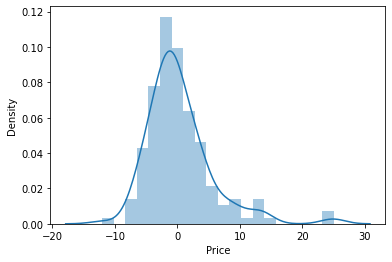

In [10]:
# graph for ridge
sns.distplot(y_test-prediction_ridge)

- See ridge gives almost perfect gaussian curve than lasso, as ridge has samll mse value. in this way we can implement all ridge and lasso.